In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a custom converter function to handle percentage values
def percent_to_float(x):
    return float(x.strip('%')) / 100

# Define the columns that need to be converted using the custom function
percent_columns = ['I1 miss rate', 'LLi miss rate', 'D1 miss rate', 'LLd miss rate', 'LL miss rate', 'Overall cache miss rate', 'Data cache miss rate', 'Weighted Miss Rate']

# Create a dictionary for converters
converters = {col: percent_to_float for col in percent_columns}

# Read the CSV data using pandas
data = pd.read_csv("get_experiment_azure.csv", thousands=',', converters=converters)

print(data)

                Policy  Total commands  Sliding Window Time  \
0               Tiered         2000000               291.69   
1               Tiered         4000000               439.02   
2               Tiered         6000000               517.74   
3               Tiered         8000000               464.27   
4               Tiered        10000000               566.12   
5              Leveled         2000000               282.75   
6              Leveled         4000000               381.24   
7              Leveled         6000000               413.66   
8              Leveled         8000000               422.52   
9              Leveled        10000000               444.72   
10   Tiered-Skewed-0.8         2000000               319.29   
11   Tiered-Skewed-0.8         4000000               484.13   
12   Tiered-Skewed-0.8         6000000               573.44   
13   Tiered-Skewed-0.8         8000000               484.06   
14   Tiered-Skewed-0.8        10000000               60

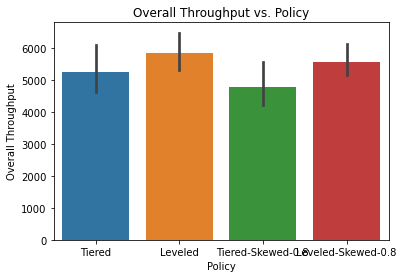

In [4]:
sns.barplot(x='Policy', y='Overall Throughput', data=data)
plt.title('Overall Throughput vs. Policy')
plt.show()


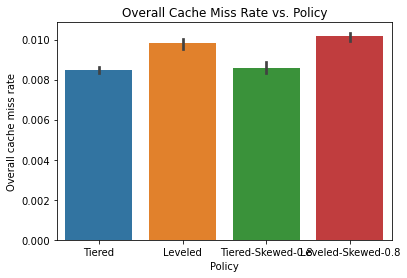

In [5]:
sns.barplot(x='Policy', y='Overall cache miss rate', data=data)
plt.title('Overall Cache Miss Rate vs. Policy')
plt.show()


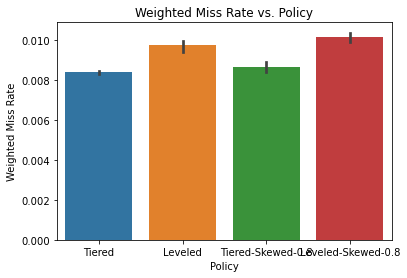

In [6]:
sns.barplot(x='Policy', y='Weighted Miss Rate', data=data)
plt.title('Weighted Miss Rate vs. Policy')
plt.show()


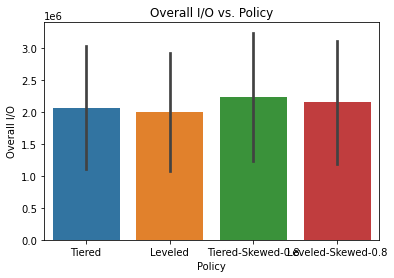

In [7]:
sns.barplot(x='Policy', y='Overall I/O', data=data)
plt.title('Overall I/O vs. Policy')
plt.show()


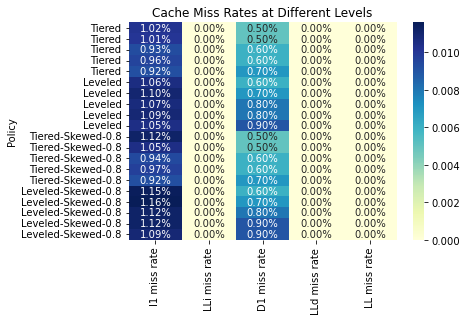

In [9]:
# Prepare data for heatmap
heatmap_data = data[['Policy', 'I1 miss rate', 'LLi miss rate', 'D1 miss rate', 'LLd miss rate', 'LL miss rate']]
heatmap_data = heatmap_data.set_index('Policy')

# Create heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".2%", cmap="YlGnBu")
plt.title('Cache Miss Rates at Different Levels')
plt.show()


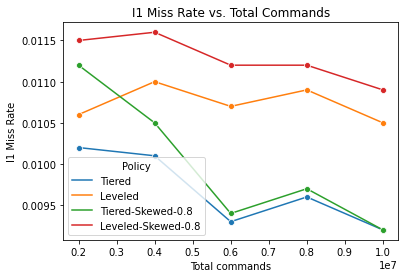

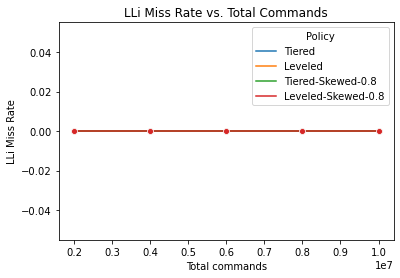

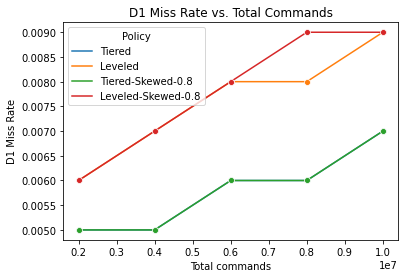

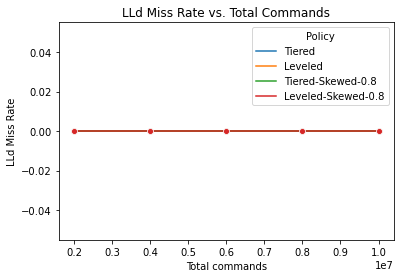

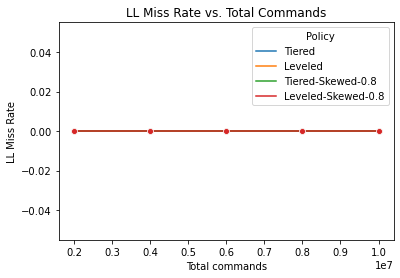

In [10]:
import matplotlib.pyplot as plt

# Prepare data for line plots
line_data = data[['Total commands', 'Policy', 'I1 miss rate', 'LLi miss rate', 'D1 miss rate', 'LLd miss rate', 'LL miss rate']]

# Plot I1 miss rate
sns.lineplot(data=line_data, x='Total commands', y='I1 miss rate', hue='Policy', marker='o')
plt.title('I1 Miss Rate vs. Total Commands')
plt.ylabel('I1 Miss Rate')
plt.show()

# Plot LLi miss rate
sns.lineplot(data=line_data, x='Total commands', y='LLi miss rate', hue='Policy', marker='o')
plt.title('LLi Miss Rate vs. Total Commands')
plt.ylabel('LLi Miss Rate')
plt.show()

# Plot D1 miss rate
sns.lineplot(data=line_data, x='Total commands', y='D1 miss rate', hue='Policy', marker='o')
plt.title('D1 Miss Rate vs. Total Commands')
plt.ylabel('D1 Miss Rate')
plt.show()

# Plot LLd miss rate
sns.lineplot(data=line_data, x='Total commands', y='LLd miss rate', hue='Policy', marker='o')
plt.title('LLd Miss Rate vs. Total Commands')
plt.ylabel('LLd Miss Rate')
plt.show()

# Plot LL miss rate
sns.lineplot(data=line_data, x='Total commands', y='LL miss rate', hue='Policy', marker='o')
plt.title('LL Miss Rate vs. Total Commands')
plt.ylabel('LL Miss Rate')
plt.show()

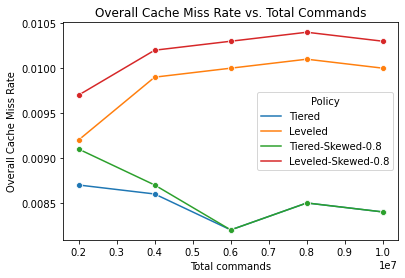

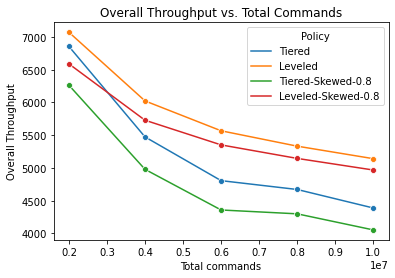

In [11]:
import matplotlib.pyplot as plt

# Prepare data for line plots
line_data_overall = data[['Total commands', 'Policy', 'Overall cache miss rate', 'Overall Throughput']]

# Plot Overall Cache Miss Rate
sns.lineplot(data=line_data_overall, x='Total commands', y='Overall cache miss rate', hue='Policy', marker='o')
plt.title('Overall Cache Miss Rate vs. Total Commands')
plt.ylabel('Overall Cache Miss Rate')
plt.show()

# Plot Overall Throughput
sns.lineplot(data=line_data_overall, x='Total commands', y='Overall Throughput', hue='Policy', marker='o')
plt.title('Overall Throughput vs. Total Commands')
plt.ylabel('Overall Throughput')
plt.show()